In [1]:
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt

#Relatório 2


**Nome:** Yasmin Souza Camargo

##Métodos

In [2]:
def eliminacaoGauss(n, A, b, arredondamento=100, pivotamento_parcial=True):
    print('\n=== ELIMINAÇÃO DE GAUSS ===')
    det = 1.0  # Inicializa variaveis
    info = 0.0

    # Verifica se as dimensões de A e b são consistentes para a eliminação de Gauss
    if len(A) != len(A[0]) or len(A) != len(b):
        return "ERRO dimensões NÃO são consistentes"

    # Loop principal para a eliminação de Gauss
    for j in range(0, n-1):
        b_copy = np.round(np.copy(b), arredondamento)

        # Escolha do pivô
        p = np.round(j, arredondamento)
        Amax = np.round(abs(A[j][j]), arredondamento)

        if pivotamento_parcial == True:
            p, Amax, det, A, b  = pivotamentoParcial(p, j, Amax, det, A, b, n, arredondamento)

        det = np.round(det * A[j][j], arredondamento)

        # Eliminação de Gauss
        if abs(A[j][j]) != 0:
            r =  np.round(1 / A[j][j], arredondamento)
            for i in range(j + 1, n):
                mult =  np.round(A[i][j] * r, arredondamento)
                A[i][j] = np.round(0, arredondamento)

                for k in range(j + 1, n):
                    A[i][k] = np.round(A[i][k] - mult * A[j][k], arredondamento)
                b[i] = np.round(b[i] - mult * b[j], arredondamento)
        else:
          if info == 0:
            info = np.round(j, arredondamento)

    det = np.round(det * A[n-1][n-1], arredondamento)

    if info == 0 and abs(A[n-1][n-1]) == 0:
        info = np.round(n, arredondamento)

    # print dos parâmetros de saída
    print(f'\nA = \n{np.round(A, arredondamento)}\n')
    print(f'b = {np.round(b, arredondamento)}\n')
    print(f'Det = {np.round(det, arredondamento)} \t Info = {np.round(info, arredondamento)}\n')

    # Retorna a solução do sistema usando a função solve do NumPy
    return np.round(np.linalg.solve(A, b), arredondamento)


In [3]:
def fatoracaoLU(m, n, A, b, arredondamento=100):
    print('\n=== FATORAÇÃO LU ===')
    Pivot = np.arange(1, n + 1)   # Inicializa variáveis
    PdU = 1
    info = 0

    # Verificar se matriz é quadrada e verifica número de termos
    if m != n or len(A) != len(b):
        return "ERRO dimensões NÃO são consistentes"

    # verifica se a matriz é não singular: det(Ak) != 0 para k = 1, 2, 3, ..., n − 1
    for k in range(0, n+1):
        if np.linalg.det(A[:k, :k]) == 0:
            return "ERRO: A matriz não é singular"

    for j in range(0, min(m, n)):
        p = j
        Amax = np.round(abs(A[j][j]), arredondamento)

        # Escolha do pivô
        for k in range(j + 1, m):
            if abs(A[k][j]) > Amax:
                Amax = abs(A[k][j])
                p = k

        if Amax == 0:
            return "ERRO: Pivô nulo encontrado."

        if p != j:
            for k in range(n):
                t = A[j][k]
                A[j][k] = A[p][k]
                A[p][k] = t

            # Troca de linhas
            temp = A[j].copy()
            A[j] = A[p]
            A[p] = temp

            i = Pivot[j]
            Pivot[j] = Pivot[p]
            Pivot[p] = i
            PdU = -PdU

        PdU = np.round(PdU * A[j][j], arredondamento)

        if abs(A[j][j]) != 0:
            r = np.round(1 / A[j][j], arredondamento)

            for i in range(j + 1, m):
                mult = np.round(A[i][j] * r, arredondamento)
                A[i][j] = mult

                for k in range(j + 1, n):
                    A[i][k] = np.round(A[i][k] - mult * A[j][k], arredondamento)
        else:
            if info == 0:
                info = j

    # Resolvendo o sistema Ax = b usando a fatoração LU
    L = np.tril(A, k=-1) + np.eye(m, n) # Matriz triangular inferior L
    U = np.triu(A)                      # Matriz triangular superior U

    y = np.round(np.linalg.solve(L, b), arredondamento)           # Resolvendo Ly = b
    x = np.round(np.linalg.solve(U, y), arredondamento)           # Resolvendo Ux = y

    # print dos parâmetros de saída
    print(f'\nA = \n{np.round(A, arredondamento)}\n')
    print(f'Pivot = {np.round(Pivot, arredondamento)} \t PdU = {np.round(PdU, arredondamento)} \t Info = {np.round(info, arredondamento)}\n')

    return np.round(np.around(x,arredondamento))

In [4]:
def fatoracaoCholesky(n, A, b, arredondamento=100):
    print('\n=== ELIMINAÇÃO DE CHOLESKY ===')
    det = 1.0
    info = 0.0

    # Verifica se a matriz é quadrada e verifica número de termos
    if len(A) != len(A[0]):
        return "ERRO dimensões NÃO são consistentes"

    # verifica se a matriz é simétrica: a[i][j] = a[j][i], para i,j=1 , …,n
    if not np.array_equal(A, np.transpose(A)):
        return "ERRO: A matriz não é simétrica"

    # verifica se a matriz é positiva definida: todos os menores principais tem determinante positivo
    for k in range(0, n):
        if np.linalg.det(A[:k, :k]) <= 0:
            return "ERRO: A matriz não é positiva definida"

    for j in range(0, n):
        Soma = 0

        for k in range(0, j):
            Soma = np.round(Soma + A[j][k] * A[j][k], arredondamento)
        t = np.round(A[j][j] - Soma, arredondamento)

        if t > 0:
            A[j][j] = np.round(math.sqrt(t), arredondamento)
            r = np.round(1 / A[j][j], arredondamento)
            det = np.round(det * t, arredondamento)
        else:
            info = j
            return('Matriz não é definida como positiva')

        for i in range(j+1, n):
            Soma = 0

            for k in range(0, j):
                Soma = np.round(Soma + A[i][k] * A[j][k], arredondamento)

            A[i][j] = np.round((A[i][j] - Soma) * r, arredondamento)

    G = np.tril(A)                      # Matriz triangular superior G
    GT = np.transpose(G)                # Matriz transposta de G

    y = np.round(np.linalg.solve(G, b), arredondamento)   # Resolvendo G . y = b
    x = np.round(np.linalg.solve(GT, y), arredondamento)  # Resolvendo G^t . x = y

    # print dos parâmetros de saída
    print(f'\nA = \n{np.round(A, arredondamento)}\n')
    print(f'Det = {np.round(det, arredondamento)}\n')
    print(f'Info = {np.round(info, arredondamento)}\n')

    return x

In [5]:
def gaussJacobi(n, A, b, toler, iterMax, arredondamento=100):
    print('\n=== GAUSS JACOBI ===')
    atendeu = testaCriterioConvergencia(A, False, arredondamento)
    if max(atendeu) == 0:
        return 'ERRO: Não é possivel aplicar o método'

    x = []
    for i in range(0, n):     # valor inicial de x
        x.append(np.round(b[i] / A[i][i], arredondamento))
    iter = 0

    while True:   # iterações de Jacob
        v = []
        iter = iter + 1
        for i in range(0, n):
            soma = 0
            for j in range(0, n):
                if i != j:
                    soma = np.round(soma + A[i][j] * x[j], arredondamento)
            v.append(np.round((b[i] - soma) / A[i][i], arredondamento))
        normaNum = 0.0
        normaDen = 0.0

        for i in range(0, n):
            t = np.round(abs(v[i] - x[i]), arredondamento)
            if t > normaNum:
                normaNum = t
            if abs(v[i]) > normaDen:
                normaDen = np.round(abs(v[i]), arredondamento)
            x[i] = np.round(v[i], arredondamento)

        normaRel = np.round(normaNum / normaDen, arredondamento)
        print(f'iter: {iter},\t x: {x},\t\t normaRel: {normaRel}')

        if normaRel <= toler or iter >= iterMax:     # teste de convergência
            break
    if normaRel <= toler:
        info = 0
    else:
        info = 1

    # print dos parâmetros de saída
    print(f'\nIter = {np.round(iter, arredondamento)} \t Info = {np.round(info, arredondamento)}\n')

    return np.round(x, arredondamento)


In [6]:
def gaussSeidel(n, A, b, toler, iterMax, arredondamento=100):
    print('\n=== GAUSS SEIDEL ===')
    atendeu = testaCriterioConvergencia(A, True, arredondamento)
    if max(atendeu) == 0:
        return 'ERRO: Não é possivel aplicar o método'

    x = []
    for i in range(0, n):     # valor inicial de x
        x.append(np.round(b[i] / A[i][i], arredondamento))

    iter = 0

    while True:   # iterações de Gauss-Seidel
        iter = iter + 1
        normaNum = 0.0
        normaDen = 0.0
        v = []
        for i in range(0, n):
            soma = 0
            for j in range(0, n):
                if i != j:
                    soma = np.round(soma + A[i][j] * x[j], arredondamento)
            v.append(np.round(x[i], arredondamento))
            x[i] = np.round((b[i] - soma) / A[i][i], arredondamento)
            t = np.round(abs(v[i] - x[i]), arredondamento)

            if t > normaNum:
                normaNum = t

            if abs(x[i]) > normaDen:
                normaDen = np.round(abs(x[i]), arredondamento)

        normaRel = np.round(normaNum / normaDen, arredondamento)
        print(f'iter: {iter},\t x: {x},\t\t normaRel: {normaRel}')

        if normaRel <= toler or iter >= iterMax:     # teste de convergência
            break
    if normaRel <= toler:
        info = 0
    else:
        info = 1

    # print dos parâmetros de saída
    print(f'\nIter = {np.round(iter, arredondamento)} \t Info = {np.round(info, arredondamento)}\n')

    return np.round(x, arredondamento)

In [7]:
def pivotamentoParcial(p, j, Amax, det, A, b, n, arredondamento): # Escolha do pivô (elemento máximo na coluna atual)
    for k in range(j+1, n):
        if abs(A[k][j]) > Amax:
            Amax = np.round(abs(A[k][j]), arredondamento)
            p = np.round(k, arredondamento)

    if Amax == 0:
        return "ERRO: Pivô nulo encontrado."

    # Troca de linha se necessário
    if p != j:
        for k in range(0, n):
            t = np.round(A[j][k], arredondamento)
            A[j][k] = np.round(A[p][k], arredondamento)
            A[p][k] = np.round(t, arredondamento)
        t = np.round(b[j], arredondamento)
        b[j] = np.round(b[p], arredondamento)
        b[p] = np.round(t, arredondamento)
        det = np.round(- det, arredondamento)

    return np.round(p, arredondamento), np.round(Amax, arredondamento), np.round(det, arredondamento), np.round(A, arredondamento), np.round(b, arredondamento)

In [8]:
def testaCriterioConvergencia(A, testarSassenfield, arredondamento=100):
    atendeu = [0,0,0]
    print('Verificações dos critérios de convergência: ')
    atendeu[0] = raioEspectral(A)
    atendeu[1] = diagonalmenteDominante(A, arredondamento)
    if testarSassenfield == True:
        atendeu[2] = sassenfield(A, arredondamento)
    print('\n')
    return atendeu

def raioEspectral(A):
    autovalores, autovetores = np.linalg.eig(A)

    if abs(max(autovalores, key=float)) > 1:
        print(' - Não atende ao critério do Raio Espectral')
        return 0
    else:
        print(' - Atende critério do Raio Espectral')
        return 1

def diagonalmenteDominante(A, arredondamento=100):
    naoConvergiu_LINHAS = 0
    naoConvergiu_COLUNAS = 0

    # critério LINHAS
    for i in range(0, len(A)):
        somaColuna = 0
        for j in range(0, len(A[i])):
            if i != j:
                somaColuna += np.round(A[i][j], arredondamento)
        if A[i][i] <= somaColuna:
            naoConvergiu_COLUNAS = 1

    # critério COLUNAS
    for i in range(0, len(A)):
        somaLinha = 0
        for j in range(0, len(A[i])):
            if i != j:
                somaLinha += np.round(A[j][i], arredondamento)
        if A[i][i] <= somaLinha:
            naoConvergiu_LINHAS = 1

    if naoConvergiu_LINHAS == 1 and naoConvergiu_COLUNAS == 1:
        print(" - A matriz NÃO é Diagonalmente Dominante (não atende críterio das linhas nem das colunas)")
        return 0
    elif naoConvergiu_LINHAS == 1:
        print(" - Atende o critério das colunas")
        return 1
    elif naoConvergiu_COLUNAS == 1:
        print(" - Atende o critério das linhas")
        return 1
    else:
        print(" - Atende o critério das linhas e colunas")
        return 1

def sassenfield(A, arredondamento=100):
    b = []

    for i in range(0, len(A)):
        somaColuna = 0
        for j in range(0, len(A[i])):
            if (i != j and i == 0) or i < j:
                somaColuna += np.round(A[i][j], arredondamento)
            elif i != j and i != 0:
                somaColuna += np.round(A[i][j] * b[j], arredondamento)

        somaColuna = np.round(somaColuna / A[i][i], arredondamento)
        b.append(somaColuna)

    if max(b) > 1:
        print(" - A matriz NÃO antende ao critério de sassenfield")
        return 0
    else:
        print(" - Atendeu ao critério de sassenfield")
        return 1

##Questões

###Questão 1
**Considere os seguintes sistemas:**
\begin{equation}
\begin{cases}
    0.03x_1 + 58.9x_2 &= 59.2 \\
    5.31x_1 - 6.10x_2 &= 47.0 \\
\end{cases}
\end{equation}

\begin{equation}
\begin{cases}
    3.03x_1 - 12.1x_2 + 14x_3 &= -119 \\
    -3.03x_1 + 12.1x_2 - 7x_3 &= 120 \\
    6.11x_1 - 14.2x_2 + 21x_3 &= -139 \\
\end{cases}
\end{equation}

**a) Resolva os sistemas acima usando o Métodos Direto de Eliminação de Gauss com Pivotamento e operações aritméticas com aproximação de três dígitos por
arredondamento.**


O procedimento inicial para abordar essa questão consiste em criar a matriz "A" e o vetor "b" para representar o problema. Posteriormente, o método da Eliminação de Gauss é aplicado para os dois sistemas.

O método que elaborei requer como parâmetros a ordem da matriz, a matriz "A" dos coeficientes e o vetor "b" dos termos independentes. O método permite especificar o arredondamento e desativar o pivotamento parcial, de acordo com suas preferências.

É importante ressaltar que o arredondamento é aplicado em cada uma das operações realizadas. O valor padrão, caso nenhum argumento seja fornecido para o arredondamento, é "100" (o que representa várias casas decimais para indicar que o número não está sendo arredondado). Neste caso executaremos a função com um arredondamento de três casas decimais e com pivotamento parcial.



In [9]:
#Sistema 1
A1 = np.array([[0.03, 58.9],
              [5.31, -6.10]])
b1 = np.array([59.2, 47.0])

#Sistema 2
A2 = np.array([[3.03, -12.1, 14.0],
              [-3.03, 12.1, -7.0],
              [6.11, -14.2, 21.0]], dtype=float)
b2 = np.array([-119.0, 120.0, -139.0], dtype=float)

print(f'--> RESULTADO: {eliminacaoGauss(2, A1, b1, 3, True)}\n')
print(f'--> RESULTADO: {eliminacaoGauss(3, A2, b2, 3, True)}')


=== ELIMINAÇÃO DE GAUSS ===

A = 
[[ 5.31  -6.1  ]
 [ 0.    58.937]]

b = [47.    58.918]

Det = -312.955 	 Info = 0.0

--> RESULTADO: [10.  1.]


=== ELIMINAÇÃO DE GAUSS ===

A = 
[[  6.11  -14.2    21.   ]
 [  0.      5.043   3.437]
 [  0.      0.      6.997]]

b = [-139.      50.917    0.949]

Det = -215.599 	 Info = 0.0

--> RESULTADO: [ 0.034 10.004  0.136]


Como é possível perceber, o método de eliminação de Gauss produziu soluções para ambos os sistemas em questão. No caso do Sistema 1, os valores encontrados foram x1=10 e x2=1. Quanto ao Sistema 2, os resultados foram os seguintes: x1=0.034, x2=10.004 e x3=0.136.


**b) Verifique se os sistemas acima são convergente se aplicarmos os Métodos Iterativos
de Gauss-Jacobi e Gauss-Seidel. Justifique sua resposta.**

Em relação às considerações de convergência, foram implementadas três funções para avaliar cada um dos critérios: verificação do raio espectral, verificação se a matriz é diagonalmente dominante (tanto pelo critério das linhas quanto pelo critério das colunas) e, no caso do Gauss-Seidel, a aplicação do critério de Sassenfield.

Se algum desses critérios for atendido, o método continua a execução normalmente. Caso contrário, a execução é interrompida, uma vez que o cálculo não pode ser realizado.

A seguir, são realizadas quatro execuções: duas para o primeiro sistema (uma utilizando Gauss-Jacobi e outra Gauss-Seidel) e mais duas execuções para o segundo sistema. Como a precisão e o número máximo de iterações não foram especificados, defini valores padrão de 0.0001 e 100, respectivamente.

In [10]:
print(f'--> RESULTADO: {gaussJacobi(2, A1, b1, 0.0001, 100, 3)}\n\n')
print(f'-->RESULTADO: {gaussSeidel(2, A1, b1, 0.0001, 100, 3)}')

print(f'--> RESULTADO: {gaussJacobi(3, A2, b2, 0.0001, 100, 3)}\n\n')
print(f'-->RESULTADO: {gaussSeidel(3, A2, b2, 0.0001, 100, 3)}')


=== GAUSS JACOBI ===
Verificações dos critérios de convergência: 
 - Não atende ao critério do Raio Espectral
 - Atende o critério das linhas e colunas


iter: 1,	 x: [10.006, 1.001],		 normaRel: 0.115
iter: 2,	 x: [10.001, 1.0],		 normaRel: 0.0

Iter = 2 	 Info = 0

--> RESULTADO: [10.001  1.   ]



=== GAUSS SEIDEL ===
Verificações dos critérios de convergência: 
 - Não atende ao critério do Raio Espectral
 - Atende o critério das linhas e colunas
 - Atendeu ao critério de sassenfield


iter: 1,	 x: [10.006, 1.0],		 normaRel: 0.115
iter: 2,	 x: [10.0, 1.0],		 normaRel: 0.001
iter: 3,	 x: [10.0, 1.0],		 normaRel: 0.0

Iter = 3 	 Info = 0

-->RESULTADO: [10.  1.]

=== GAUSS JACOBI ===
Verificações dos critérios de convergência: 
 - Não atende ao critério do Raio Espectral
 - A matriz NÃO é Diagonalmente Dominante (não atende críterio das linhas nem das colunas)


--> RESULTADO: ERRO: Não é possivel aplicar o método



=== GAUSS SEIDEL ===
Verificações dos critérios de convergência: 
 

<ipython-input-8-d5ae09f4d506>:14: ComplexWarning: Casting complex values to real discards the imaginary part
  if abs(max(autovalores, key=float)) > 1:


Como é possível analizar para o primeiro sistema gauss jacobi e gauss seidel conseguiram encontrar o resultado (os mesmos valores encontrados pela eliminação de gauss). No segundo sistema nenhum dos métodos conseguiu encontrar os resultados, visto que não atenderam nenhum dos critérios de convergência.

Os resultados obitidos evidenciam a questão que embora os método interativos serem frequentemente mais eficientes para resolver sistemas nem sempre conseguem ser aplicados. A Eliminação de Gauss sempre consegue encontrar um resultado porque é um método direto para resolver sistemas e não possui as mesmas restrições de convergência que os métodos iterativos, como Gauss-Jacobi e Gauss-Seidel.

###Questão 2
**Uma indústria produz 4 tipo de produtos (1), (2), (3) e (4), os quais são processados e produzidos no decorrer da semana. Para produção de cada unidade desses produtos necessita-se de 4 diferentes tipos de matéria-prima (A), (B), (C) e (D), conforme tabela dada:**
\begin{array}{c|cccc}
    & (A) & (B) & (C) & (D) \\
    \hline
    (1) & 1 & 2 & 4 & 1 \\
    (2) & 2 & 0 & 1 & 0 \\
    (3) & 4 & 2 & 3 & 1 \\
    (4) & 3 & 1 & 2 & 1 \\
\end{array}

**Por exemplo, para produzir uma unidade de (1) precisa-se de 1 unidade de A, 2 unidades de (B), 4 unidades de (C) e 1 unidade de (D).**
**A indústria possui disponível em estoque 16, 13, 27 e 7 unidades de (A), (B), (C) e (D), respectivamente. Quantas unidades de cada produto podem ser produzidas?**
**Formule um modelo matemático, resolva-o usando o Método Direto de Fatoração LU e analise os resultados obtidos.**

Estruturando primeiramente os dados fonecidos no exercício:
- total disponível para cada produto: A = 16, B = 13, C = 27 e D = 7, estes valores representam o vetor de termos idependetes
- vou chamar o produto (1) de x1 , produto (2) de x2, produto (3) de x3 e produto (4) de x4
- colocando o sistema em relação a materia prima temos o seguinte:
\begin{equation}
\begin{cases}
    1x_1 + 2x_2 + 4x_3 + 3x_3 &= 16 \\
    2x_1 + 0x_2 + 2x_3 + 1x_3 &= 13 \\
    4x_1 + 1x_2 + 3x_3 + 2x_3 &= 27 \\
    1x_1 + 0x_2 + 1x_3 + 1x_3 &= 7 \\
\end{cases}
\end{equation}

Assim, com este novo sistema podemos montar a matriz e executar o método da fatoração LU

In [11]:
A3 = np.array([[1, 2, 4, 3],
              [2, 0, 2, 1],
              [4, 1, 3, 2],
              [1, 0, 1, 1]], dtype=float)
b3 = np.array([16, 13, 27, 7], dtype=float)

print(f'--> RESULTADO: {fatoracaoLU(4, 4, A3, b3)}\n\n')


=== FATORAÇÃO LU ===

A = 
[[ 1.    2.    4.    3.  ]
 [ 2.   -4.   -6.   -5.  ]
 [ 4.    1.75 -2.5  -1.25]
 [ 1.    0.5  -0.    0.5 ]]

Pivot = [3 1 2 4] 	 PdU = 5.0 	 Info = 0

--> RESULTADO: [5. 2. 1. 1.]




O algoritmo de Fatoração LU foi executado com sucesso para resolver o sistema linear associado à produção dos produtos (1), (2), (3) e (4), levando em consideração as restrições de disponibilidade das matérias-primas (A, B, C, D). Os resultados obtidos indicam que a indústria pode produzir as seguintes quantidades de cada produto: 5 unidades do produto (1), 2 unidades do produto (2), 1 unidade do produto (3) e 1 unidade do produto (4).

Essas são as quantidades de produção que atendem às restrições de disponibilidade das matérias-primas e aos requisitos de produção de cada produto.

###Questão 3
**Considere o sistema:**
\begin{equation}
\begin{cases}
    1x_1 + x_2 + 3x_3 &= -2 \\
    \alpha x_1 + x_2 + 4x_3 &= -3 \\
    5x_1 + 2x_2 + 1x_3 &= 4 \\
\end{cases}
\end{equation}

**Para os valores de α:**

**a) A matriz A pode ser decomposta em L.U? Justifique.**

Antes de abordarmos essa questão, é crucial compreender as condições essenciais para que uma matriz seja decomposta em L.U.. A principal restrição é que a matriz deve ser não singular, ou seja, seu determinante deve ser diferente de zero (det(Ak) != 0 para k = 1, 2, 3, ..., n − 1).

Assim, para avaliar essa condição, é necessário calcular o determinante da matriz. Para esta tarefa, utilizei uma biblioteca sympy do Python que possibilita o uso de incógnitas.


In [12]:
alpha = sp.symbols('alpha')
A4 = sp.Matrix([[1, 1, 3],
              [alpha, 1, 4],
              [5, 2, 1]], dtype=float)
determinante = A4.det()
print(f"Determinante: {determinante}")

Determinante: 5*alpha - 2


Observando o resultado do determinante, fica evidente que a resposta para a pergunta é: depende! Isso ocorre porque o valor atribuído a α pode influenciar o determinante, podendo levá-lo a zero, o que implicaria na impossibilidade de aplicar o método. No entanto, se o valor de α resultar em um determinante diferente de zero, então é possível proceder com a resolução por meio da decomposição L.U..

Para determinar qual é esse valor crítico, podemos igualar a equação do determinante a zero e resolver:

In [13]:
print(f"Alfa = {sp.solve(sp.Eq(determinante, 0), alpha)}")

Alfa = [2/5]


O valor 2/5 é identificado como um ponto em que o determinante se anula. Portanto, realizaremos um teste comparativo utilizando α=2/5 e, em contrapartida, α=2. Executaremos o método de decomposição LU em ambos os casos para avaliar os resultados obtidos.

In [14]:
A5 = np.array([[1, 1, 3],
               [2/5, 1, 4],
               [5, 2, 1]], dtype=float)
b5 = np.array([-2, -3, 4], dtype=float)
print(fatoracaoLU(3, 3, A5, b5))

A6 = np.array([[1, 1, 3],
               [2, 1, 4],
               [5, 2, 1]], dtype=float)
b6 = np.array([-2, -3, 4], dtype=float)
print(fatoracaoLU(3, 3, A6, b6))


=== FATORAÇÃO LU ===
ERRO: A matriz não é singular

=== FATORAÇÃO LU ===

A = 
[[ 1.  1.  3.]
 [ 2. -1. -2.]
 [ 5.  3. -8.]]

Pivot = [3 1 2] 	 PdU = 8.0 	 Info = 0

[ 0.  2. -1.]


Ao empregar dois valores distintos para α, observamos um cenário no qual a fatoração LU não é aplicável e outro no qual o método foi bem-sucedido. Portanto, sem valores específicos para α, não podemos determinar exatamente quais valores garantiriam que a matriz A seja não-singular.

**b) O sistema pode ser resolvido por Fatoração Cholesky? Justifique.**

Assim como foi feito na questão anterior podemos analizar quais são as condições para aplicar a fatoração de Cholesky:
- A matriz é simétrica: a[i][j] = a[j][i], para i,j=1 , …,n
- A matriz é positiva definida: todos os menores principais tem determinante positivo

Podemos verificar que a primeira condição não é atendida, uma vez que ela não é simétrica. Por exemplo, A[0][2] != A[2][0], pois 3 != 5. Então idependente do valor de α aplicado não vai ser possível aplicar a fatoração de cholesky.

Podemos testar isso executando o método para α = 2.

In [15]:
print(fatoracaoCholesky(3, A6, b6))


=== ELIMINAÇÃO DE CHOLESKY ===
ERRO: A matriz não é simétrica


Como a matriz fornecida não é simétrica, a Fatoração de Cholesky não pode ser justificada para resolver esse sistema.

**c) Considere α = 1 e resolva o sistema pelo Método de Eliminação de Gauss**

In [16]:
A7 = np.array([[1, 1, 3],
              [1, 1, 4],
              [5, 2, 1]], dtype=float)
b7 = np.array([-2, -3, 4], dtype=float)
print(f'--> RESULTADO: {eliminacaoGauss(3, A7, b7)}\n\n')


=== ELIMINAÇÃO DE GAUSS ===

A = 
[[ 5.   2.   1. ]
 [ 0.   0.6  3.8]
 [ 0.   0.  -1. ]]

b = [ 4.  -3.8  1. ]

Det = 3.0 	 Info = 0.0

--> RESULTADO: [ 1.  0. -1.]




A Eliminação de Gauss demonstra sua eficácia ao ser aplicada, mesmo em cenários nos quais a matriz não é simétrica ou singular, condições que inviabilizam a aplicação dos métodos Cholesky e LU. Esta eficácia vem da ausência de restrições específicas nesse método, permitindo sua aplicação a uma ampla variedade de matrizes.

###Questão 4
**Uma equipe de três paraquedistas ligados por uma corda de peso desprezável é
lançada em queda livre a uma velocidade v = 5 m/s. Considere os seguintes dados:**
\begin{array}{c|ccc}
    Paraquedista (i) & Massa (mi) Kg & Coef. de resistência (ci) (Kg/s) \\
    \hline
    1 & 70 & 10 \\
    2 & 60 & 14 \\
    3 & 40 & 17 \\
\end{array}

**O sistema linear resultante permite calcular a tensão em cada secção da corda (R e T ) e a aceleração da equipe (a)**
\begin{equation}
\begin{cases}
    m1. g – c1. v – T = m1 . a \\
    m2. g – c2. v + T – R = m2 . a \\
    m3. g – c3. v + R = m3 . a \\
\end{cases}
\end{equation}

**(considere g = 9.8 m/s2).**

**O que poderia dizer acerca da convergência do mé todo iterativo de Gauss-Seidel quando aplicado ao sistema? Justifique**

Substituindo os dados temos:
\begin{equation}
\begin{cases}
    70 * 9.8 - 10 * 5 - t = 70 * a  \\
    60 * 9.8 - 14 * 5 + t - r = 60 * a \\
    40 * 9.8 - 17 * 5 + r = 40 * a \\
\end{cases}
\end{equation}

Simplificando e deixando as incógnitas do lado esquerdo temos o seguinte sistema:

\begin{equation}
\begin{cases}
    t + 70a =  636  \\
    t - r - 60a = -518 \\
    r - 40a = -307 \\
\end{cases}
\end{equation}

Assim, podemos montar a matriz correpondente e executar o método de Gauss-Seidel:

In [17]:
A8 = np.array([[1, 0, 70],
              [1, -1, -60],
              [0, 1, -40]], dtype=float)
b8 = np.array([636, -518, -307], dtype=float)
print(f'--> RESULTADO: {gaussSeidel(3, A8, b8, 0.001, 100)}\n\n')


=== GAUSS SEIDEL ===
Verificações dos critérios de convergência: 
 - Não atende ao critério do Raio Espectral
 - A matriz NÃO é Diagonalmente Dominante (não atende críterio das linhas nem das colunas)
 - A matriz NÃO antende ao critério de sassenfield


--> RESULTADO: ERRO: Não é possivel aplicar o método




Como é possível perceber o método não passou por nenhum dos três critérios de convergência. Logo, indica que o sistema não está em conformidade com os requisitos necessários para o método de Gauss-Seidel. Isso torna inviável o uso desse método para resolver o sistema em questão.

Se os critérios não forem atendidos, o método de Gauss-Seidel pode não convergir, levando a iterações indefinidas ou atingindo o número máximo estabelecido. Nessas circunstâncias, é essencial considerar outras abordagens, como o método direto de eliminação de Gauss, que podem ser mais adequadas em determinadas situações.

###Questão 5
**Resolva o seguinte sistema de equações**
\begin{equation}
\begin{cases}
    1,05 x1 + 2,05 x2 = 5,15 \\
    1,1 x1 + 2,0 x2 = 5,1 \\
\end{cases}
\end{equation}

**a) Graficamente.**


Para resolver este exercício primeiramente deve-se isolar cada equação para deixar tudo em função de uma variavel, nesse caso x2 será isolada. Resultando em:

\begin{align}
    x_2 &= \frac{5.15 - 1.05 \cdot x_1}{2.05} \\
    x_2 &= \frac{5.1 - 1.1 \cdot x_1}{2.0}
\end{align}

Dessa forma é possível plotar o gráfico da função:

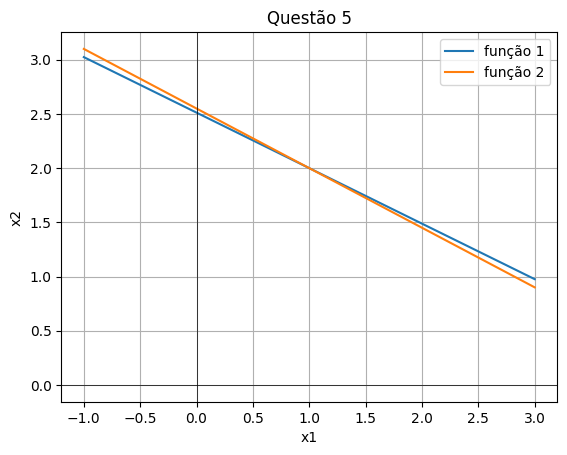

In [18]:
def f1(x):
    return (5.15 - 1.05 * x) / 2.05

def f2(x):
    return (5.1 - 1.1 * x) / 2.0

x = np.linspace(-1, 3, 10)
y1 = f1(x)
y2 = f2(x)

plt.plot(x, y1, label='função 1')
plt.plot(x, y2, label='função 2')

plt.title('Questão 5')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Exiba o gráfico
plt.grid(True)
plt.show()

Ao observar o gráfico é possível perceber que o ponto de encontro das duas funções acontece muito próximo de x1 e x2

**b) Por Eliminação de Gauss com Pivotamento Parcial, de modo exato.**

In [19]:
A9 = np.array([[1.05, 2.05],[1.1, 2.0]], dtype=float)
b9 = np.array([5.15, 5.1], dtype=float)

print(f'--> RESULTADO: {eliminacaoGauss(2, A9, b9)}\n\n')


=== ELIMINAÇÃO DE GAUSS ===

A = 
[[1.1        2.        ]
 [0.         0.14090909]]

b = [5.1        0.28181818]

Det = -0.15499999999999925 	 Info = 0.0

--> RESULTADO: [1. 2.]




O resultado encontrado utilizando pivotamento parcial e sem arredondamento foi x1 = 1 e x2 = 2

**c) Por Eliminação de Gauss com Pivotamento Parcial, mas com três algarismos significativos, utilizando arredondamento.**

In [20]:
A10 = np.array([[1.05, 2.05],[1.1, 2.0]], dtype=float)
b10 = np.array([5.15, 5.1], dtype=float)
print(f'--> RESULTADO: {eliminacaoGauss(2, A10, b10, 3)}\n\n')


=== ELIMINAÇÃO DE GAUSS ===

A = 
[[1.1   2.   ]
 [0.    0.142]]

b = [5.1   0.285]

Det = -0.156 	 Info = 0.0

--> RESULTADO: [0.987 2.007]




O resultado encontrado utilizando pivotamento parcial e com arredondamento de três casas decimais foi um pouco diferente foi x1 = 0.987 e x2 = 2.007

**d) Justifique os resultados obtidos.**

Graficamente visualizamos que o resultado de x1 e x2 está próximo de 1 e 2, na próxima execução confirmamos os pontos x1 = 1 e x2 = 2 (modo exato) e na última execução obtivemos resultados diferentes apesar de serem próximos.
Primeiramente, vale destacar que quando se está utilizando um método com arredondamento, está introduzindo uma forma de erro de arredondamento, no qual espera-se afetar a precisão dos resultados. Isso realmente acontece como foi percebido.

É importante destacar que o pivoteamento é uma estratégia que visa reduzir estes problemas de arredondamento durante a Eliminação de Gauss. A ideia principal é escolher o elemento pivô de cada coluna de forma a minimizar os erros de arredondamento. No Pivoteamento Parcial está se escolhendo o maior elemento em módulo como pivô. Isso ajuda a minimizar os efeitos de arredondamento, pois números maiores geralmente têm uma representação mais precisa em aritmética de ponto flutuante.

Portanto, esses resultados evidenciam que mesmo que os resultados sem e com arredondamento se aproximem graficamente, a sensibilidade do método de eliminação de Gauss às pequenas variações nos cálculos pode levar a soluções ligeiramente diferentes.